## Victor Manuel Gómez Espinosa
### victor.gomez@cimat.mx

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#librerias
import os
CurrentPath = '/content/drive/My Drive/KUESKI_Challenge'

os.chdir(CurrentPath) #cambiar la ubicacion a la carpeta donde se encuentra este archivo
!ls #listar los documentos en esta ruta

 1_Basic_exploratory_analysis.ipynb	       Formulas_mult.py
 2_Model_implementation.ipynb		       listings_reduced.csv
 3_Analytics_on_the_model_performance1.ipynb   _missing_value.py
 3_Analytics_on_the_model_performance2.ipynb   __pycache__
'Challenge - Jr. Data Scientist (1).pdf'       resultados.csv
 datos_completos.csv			       XGBBEST.sav
 datos.csv


In [ ]:
# librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances

Clases y funciones de mi autoria

## NOTA: Esta parte hasta la aplicación de MDS se ejecutó de forma local por algunos problemas con colab al leer Formulas_mult

In [ ]:
from Formulas_mult import *

In [ ]:
df=pd.read_csv('datos_completos.csv') #lee los datos
df=df.drop(columns=['Unnamed: 0','Unnamed: 0.1']) #cargamos los datos completos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11263 entries, 0 to 11262
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   host_listings_count                    11263 non-null  float64
 1   latitude                               11263 non-null  float64
 2   longitude                              11263 non-null  float64
 3   accommodates                           11263 non-null  int64  
 4   bathrooms                              11263 non-null  float64
 5   bedrooms                               11263 non-null  float64
 6   beds                                   11263 non-null  float64
 7   guests_included                        11263 non-null  int64  
 8   minimum_nights                         11263 non-null  int64  
 9   availability_90                        11263 non-null  int64  
 10  number_of_reviews                      11263 non-null  int64  
 11  re

In [ ]:
df2=df.drop(columns=['price_pred','errors','errorCat','room_type']) #dejamos solo las características X

Checamos normalidad multivariada y buscamos outliers

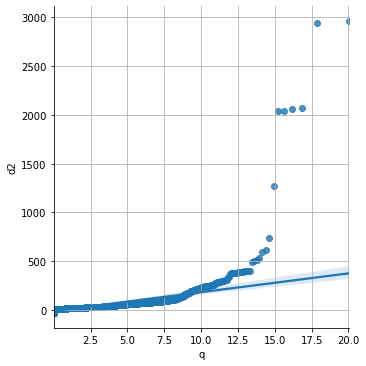

Reject H0


In [ ]:
by_dist,rej=chi2plot(df2,line='r') #grafico chi2
print(rej) #Looney & Gulledge Test

No sigue una distribución normal multivariada y se notan muchos outliers

Posibles outliers

In [ ]:
idx=by_dist.tail(15).index #outliers
idx

Int64Index([ 3830,  1172,  6737,  1963,  4347,  7181,   217,  7782, 10641,
             6242,  6243,  6241,  6240,  4843,    71],
           dtype='int64')

In [ ]:
df.iloc[idx,:]

host_listings_count  latitude  longitude  accommodates  bathrooms  \
3830                 893.0  37.97550   23.73190             4        1.0   
1172                   1.0  37.97828   23.75610             4        1.0   
6737                  91.0  37.98665   23.74636            16       10.0   
1963                   1.0  37.99331   23.75319             2        1.0   
4347                   5.0  37.97686   23.72563             2        1.0   
7181                1111.0  37.99145   23.72260             4        1.0   
217                    1.0  37.97430   23.75492             4        1.0   
7782                   1.0  38.02924   23.74081             4        1.0   
10641                  1.0  37.99481   23.72833             2        1.5   
6242                   4.0  37.96472   23.72808             2        1.0   
6243                   4.0  37.96650   23.72708             3        1.0   
6241                   4.0  37.96652   23.72632             2        1.0   
6240                   4.0  37.96698   23.72792             1        1.0   
4843                   1.0  37.99807   23.73580             7        2.0   
71                    15.0  37.97598   23.71932             4        1.0   

       bedrooms  beds  guests_included  minimum_nights  availability_90  ...  \
3830        0.0   3.0                1               1               90  ...   
1172        1.0   3.0                2             399                0  ...   
6737       14.0  14.0                1               1               11  ...   
1963        2.0   3.0                1             345               90  ...   
4347        1.0  23.0                2               1               83  ...   
7181        1.0   2.0                4               3                0  ...   
217         2.0   2.0                4             444               90  ...   
7782        0.0   0.0                1               1               87  ...   
10641       1.0   3.0                1               1               90  ...   
6242        1.0   1.0                2               1               89  ...   
6243        1.0   2.0                3               1               90  ...   
6241        1.0   1.0                2               1               90  ...   
6240        1.0   1.0                1               1               90  ...   
4843        3.0   4.0                1            1000               89  ...   
71          2.0   1.0                2            1000               60  ...   

       host_identity_verified_True  room_type_Entire home/apt  \
3830                             1                          1   
1172                             0                          1   
6737                             0                          1   
1963                             1                          1   
4347                             0                          0   
7181                             0                          1   
217                              1                          1   
7782                             0                          1   
10641                            0                          0   
6242                             0                          0   
6243                             0                          0   
6241                             0                          0   
6240                             0                          0   
4843                             0                          1   
71                               1                          1   

       room_type_Hotel room  room_type_Private room  room_type_Shared room  \
3830                      0                       0                      0   
1172                      0                       0                      0   
6737                      0                       0                      0   
1963                      0                       0                      0   
4347                      0                       1                      0   


# Aplicamos MDS para encontrar grupos con características similares

In [ ]:
# preparamos los datos
X2=df2.values
price=df.price
errors=df.errors
errorCat=df.errorCat
room_type=df.room_type

# estandarizamos
ss = StandardScaler()
X_scaled = ss.fit_transform(X2) 


In [ ]:
# MDS clasico
d=pairwise_distances(X_scaled) #disimilaridades

n,m=d.shape
A=(-1/2)*d**2
H = np.identity(n) - (1/n)*(np.ones([n,1])@np.ones([1,n]))
B=H@A@H

u, s, vh=np.linalg.svd(B)

In [ ]:
# información de los componentes
ei=np.cumsum(s)/np.sum(np.abs(s))
ei[0:10]

array([0.22939098, 0.34369789, 0.40847173, 0.46740865, 0.51717579,
       0.5592658 , 0.5991294 , 0.6361652 , 0.6716678 , 0.70597695])

In [ ]:
# primeros dos componentes
v=vh.T
x1s=np.sqrt(s[0])*v[:,0]
x2s=np.sqrt(s[1])*v[:,1]

In [ ]:
df['Mdsc1']=x1s
df['Mdsc2']=x2s

In [ ]:
df.to_csv('resultados.csv') #guardamos 

# Visualizando resultados

In [ ]:
df=pd.read_csv('resultados.csv') #lee los datos
df=df.drop(columns=['Unnamed: 0']) #cargamos los datos completos

In [ ]:

fig = px.scatter(df, x='Mdsc1', y='Mdsc2', color='review_scores_cleanliness', hover_data=['errorCat','host_listings_count','price','room_type','bathrooms','latitude','beds','review_scores_cleanliness'])
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()

In [ ]:
fig = px.scatter(df, x='Mdsc1', y='Mdsc2', color='bathrooms', hover_data=['errorCat','host_listings_count','price','room_type','bathrooms','latitude','beds','review_scores_cleanliness'])
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()

In [ ]:
fig = px.scatter(df, x='Mdsc1', y='Mdsc2', color='beds', hover_data=['errorCat','host_listings_count','price','room_type','bathrooms','latitude','beds','review_scores_cleanliness'])
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()

Observaciones:
- Eje horizontal hacia la izquierda aumenta la puntuación de limpieza
- Eje vertical, hacia abajo aumenta el número de baños y camas


In [ ]:

fig = px.scatter(df, x='Mdsc1', y='Mdsc2', color='price', hover_data=['errorCat','host_listings_count','price','room_type','bathrooms','latitude','beds','review_scores_cleanliness'])
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()

Observaciones:
- Los puntos que se alejan de los clusters son los probables datos atípicos, por ejemplo, aquellas habitaciones con precios muy elevados se nota que se alejan un poco, o con muchas camas o baños y con diferentes precios


In [ ]:
fig = px.scatter(df, x='Mdsc1', y='Mdsc2', color='room_type', hover_data=['errorCat','host_listings_count','price','room_type','bathrooms','latitude','beds','review_scores_cleanliness'])
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()

In [ ]:
fig = px.scatter(df, x='Mdsc1', y='Mdsc2', color='errorCat', hover_data=['errorCat','host_listings_count','price','room_type','bathrooms','latitude','beds','review_scores_cleanliness'])
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()

Observaciones:
- Se nota que se separan en dos grupos, principalmente por la puntuacion de limpieza en el eje horizontal, dentro de estos tenemos los diferentes tipos de habitación (habitación de hotel, compartida, etc.)
- Estos dos grupos son de diferente tamaño, y a su vez dentro de estos los grupos de tipo de habitación también
- Estos grupos desbalanceados son los que pueden estar ocasionando problemas al modelo, además de los valores atípicos


Como podría mejorar el modelo?

Considero que el modelo tiene un buen desempeño en la mayoría de los casos (95%), pero para mejorarlo se podrían tomar algunas acciones:
-	Primero, verificar con el experto en el tema que los probables datos atípicos lo sean y qué hacer con ellos (quitarlos, imputarlos o dejarlos)
-	Segundo, una vez hecho lo anterior se podría hacer un nuevo ajuste del modelo buscando los mejores hiper parámetros, puesto que ha habido un cambio en los datos (recordar también que se ajustó con datos faltantes y después se imputaron)
-	Tercero, se podría a futuro tratar de construir un dataset mas balanceado con estas características para tratar el problema de regresión desbalanceada o buscar en la literatura algún método eficaz para tratar el problema de regresión desbalanceada y aplicarlo sobre estos datos y ajustar el modelo.
